# **Title: PPLM - Pluggable playable Language Model**


---



---



Subramanian Kaushik Gurumoorthy - sgurumoorthy@ryerson.ca


# **Introduction:**


## **Problem Description:**
Large transformer-based language models (LMs) trained on huge text corpora have shown unparalleled generation capabilities. However, controlling attributes of the generated language (e.g. switching topic or sentiment) is difficult without modifying the model architecture or fine-tuning on attribute-specific data and entailing the significant cost of retraining.

## **Context of the Problem:**
The largest, most capable language models are huge (e.g., over a billion parameters), require massive amounts of compute resources (e.g., $61,000 USD to train one model), and must be trained on enormous data sets which are often not publicly released even when the training code is available.So there is a need to come up with an approach to reuse the existing model without retraining it or fine tuning

## **Limitation About other Approaches:**
Researchers around the world have proposed multiple ways of conditioning text generation, including starting with a pre-trained LM and fine-tuning it to always produce positive sentences, training a large conditional model from scratch, or turning a given sentence into a more positive one by substituting new text in for key n-grams, but all these approaches required effort to retrain the model or a trade off in text generated quality or using exisiting unconditional language models

## **Solution:**
The authors of the paper have proposed a novel way which allows an user to flexibly plug in one or more simple attribute models representing the desired control objective into a large, unconditional LM to steer the topic and sentiment of text generation.

#  **Background**

## **Related work**


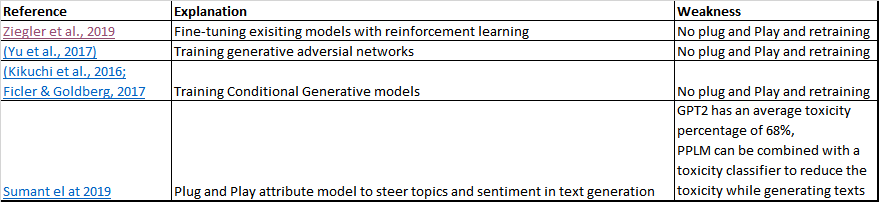

## **Comparision of Language Models with PPLM**

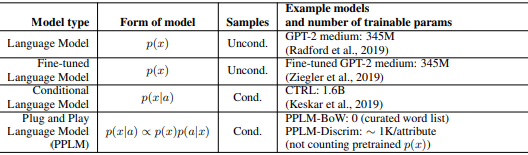






The last row in this table should be about the method discussed in this paper (If you can't find the weakenss of this method then write about the future improvement, see the future work section of the paper)

# **Methodology**



PPLM employs a pre-trained language model (LM) without any changes to the model parameters and can generate text with controlled attributes such as topic and sentiment. We demonstrate control with two tiny and easy to construct attribute models: a bag of words (BoW) related to a "topic" and a linear discriminator trained on top of LM latent representations to control "sentiment".

# **Implementation**

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [ ]:
!git clone https://github.com/gskaushik/PPLM.git
import os
os.chdir('PPLM')
os.chdir('src')

Cloning into 'PPLM'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 337 (delta 31), reused 42 (delta 8), pack-reused 250
Receiving objects: 100% (337/337), 3.18 MiB | 7.69 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
#!pip install -r requirements.txt -- Should be run in case if you are facing No module error
#Load the GPT2 transformer model
from transformers.modeling_gpt2 import GPT2LMHeadModel
from run_pplm import run_pplm_example
# This downloads GPT-2 Medium, it takes a little while
_ = GPT2LMHeadModel.from_pretrained("gpt2-medium")

## Topic - Technology , Sentiment - Negative




In [ ]:
# Enter a text to be used to complete the text generation
# Running the example module 
run_pplm_example(
    cond_text="Potato dish is good", 
    num_samples=3, #number of text generated 
    bag_of_words='technology', # The valid values are science politics religion legal military space technology
    length=30, # Length of the generated text
    stepsize=0.03, # To intensify topic control, and decrease its value to soften the control.
    sample=True,
    num_iterations=3,
    window_length=5, 
    gamma=1.5,
    class_label = 3, # This is to  control the sentiments 3- Negative , 2 - Positive
    gm_scale=0.95,  # These are used for tweaking the fluency of words
    kl_scale=0.01, # These are used for tweaking the fluency of words
    verbosity='regular'
)

= Prefix of sentence =
<|endoftext|>Potato dish is good

Using PPLM-BoW


/usr/local/lib/python3.7/dist-packages/transformers/modeling_gpt2.py:759: FutureWarning: The `past` argument is deprecated and will be removed in a future version, use `past_key_values` instead.
  FutureWarning,


<|endoftext|>Potato dish is good to
<|endoftext|>Potato dish is good to share
<|endoftext|>Potato dish is good to share with
<|endoftext|>Potato dish is good to share with the
<|endoftext|>Potato dish is good to share with the kids
<|endoftext|>Potato dish is good to share with the kids.
<|endoftext|>Potato dish is good to share with the kids. It
<|endoftext|>Potato dish is good to share with the kids. It makes
<|endoftext|>Potato dish is good to share with the kids. It makes a
<|endoftext|>Potato dish is good to share with the kids. It makes a great
<|endoftext|>Potato dish is good to share with the kids. It makes a great snack
<|endoftext|>Potato dish is good to share with the kids. It makes a great snack and
<|endoftext|>Potato dish is good to share with the kids. It makes a great snack and is
<|endoftext|>Potato dish is good to share with the kids. It makes a great snack and is very
<|endoftext|>Potato dish is good to share with the kids. It makes a great snack and is very easy
<|e

#### **Result** 

= **Unperturbed generated text** =
<|endoftext|>Potato dish is good to share with the kids. It makes a great snack and is very easy to make.If you are looking for a quick way to use

= **Perturbed generated text 1** =
<|endoftext|>Potato dish is good for vegetarians because it is made from whole food and doesn't need any added sugar. However, you can use whole grain dish to make vegan version

= **Perturbed generated text 2** =
<|endoftext|>Potato dish is good for people. You can serve your dish with potatoes or with rice instead. I served the potato dish with rice instead of rice. I used rice because

= **Perturbed generated text 3** =
<|endoftext|>Potato dish is good for you too. I have eaten it in a few recipes and it is very good as a starter. I have also tried making it with potatoes.


## Topic - Politics , Sentiment - Positive

In [ ]:
# Enter a text to be used to complete the text generation
# Running the example module 
run_pplm_example(
    cond_text="Canada is", 
    num_samples=3, #number of text generated 
    bag_of_words='politics', # The valid values are science politics religion legal military space technology
    length=30, # Length of the generated text
    stepsize=0.03, # To intensify topic control, and decrease its value to soften the control.
    sample=True,
    num_iterations=3,
    window_length=5, 
    gamma=1.5,
    class_label = 2, # This is to  control the sentiments 3- Negative , 2 - Positive
    gm_scale=0.95,  # These are used for tweaking the fluency of words
    kl_scale=0.01, # These are used for tweaking the fluency of words
    verbosity='regular'
)

= Prefix of sentence =
<|endoftext|>Canada is




Using PPLM-BoW


/usr/local/lib/python3.7/dist-packages/transformers/modeling_gpt2.py:759: FutureWarning: The `past` argument is deprecated and will be removed in a future version, use `past_key_values` instead.
  FutureWarning,


<|endoftext|>Canada is a
<|endoftext|>Canada is a country
<|endoftext|>Canada is a country of
<|endoftext|>Canada is a country of immigrants
<|endoftext|>Canada is a country of immigrants,
<|endoftext|>Canada is a country of immigrants, but
<|endoftext|>Canada is a country of immigrants, but that
<|endoftext|>Canada is a country of immigrants, but that does
<|endoftext|>Canada is a country of immigrants, but that does not
<|endoftext|>Canada is a country of immigrants, but that does not mean
<|endoftext|>Canada is a country of immigrants, but that does not mean that
<|endoftext|>Canada is a country of immigrants, but that does not mean that everyone
<|endoftext|>Canada is a country of immigrants, but that does not mean that everyone is
<|endoftext|>Canada is a country of immigrants, but that does not mean that everyone is born
<|endoftext|>Canada is a country of immigrants, but that does not mean that everyone is born into
<|endoftext|>Canada is a country of immigrants, but that does n

#### **Result** -
= **Unperturbed generated text**=
<|endoftext|>Canada is a country of immigrants, but that does not mean that everyone is born into the country. As the country prepares for a federal election in September, the

= **Perturbed generated text 1**=
<|endoftext|>Canada is facing a tax bill that is likely to be among the highest among OECD countries this year.Tax-related tax revenues from the federal government's

= **Perturbed generated text 2** =
<|endoftext|>Canada is one of the largest and most developed capitalist economies in the world.It is the richest, most powerful nation of democratic government.But

= **Perturbed generated text 3** =
<|endoftext|>Canada is a nation that has been a member of NATO for more than half a century, and has been at war since Confederation. It has also fought wars against


# **Conclusion and Future Direction**

PPLM, a plug and play method for controlled language generation that flexibly
combines a large, pre-trained LM and a BoW or a small, easy-to-train discriminator.It holds  great promise for enabling the next generation of language models.Future works can be done on the PPLM to have more hyperparameters one can be 'Parental Control' and effort can be done to avoid cases where model generate repitative words in generated text.

# **References**

#### **Title - Plug and Play Language Models: A Simple Approach to Controlled Text Generation**

**Author** - Sumanth Dathathri and Andrea Madotto and Janice Lan and Jane Hung and Eric Frank and Piero Molino and Jason Yosinski and Rosanne Liu

**Published at**
International Conference on Learning Representations 2020

**Link** - https://openreview.net/forum?id=H1edEyBKDS


**Other Papers:-**

Kenn Adams. Improv encyclopedia story spine. (accessed September 20, 2019)

Ashutosh Baheti, Alan Ritter, Jiwei Li, and Bill Dolan. Generating more interesting responses in
neural conversation models with distributional constraints. In Proceedings of the 2018 Conference
on Empirical Methods in Natural Language Processing, pp. 3970–3980, 2018

Yoshua Bengio, Réjean Ducharme, Pascal Vincent, and Christian Jauvin. A neural probabilistic
language model. Journal of machine learning research, 3(Feb):1137–1155, 2003

Yun Chen, Victor OK Li, Kyunghyun Cho, and Samuel R Bowman. A stable and effective learning
strategy for trainable greedy decoding. arXiv preprint arXiv:1804.07915, 2018

Ning Dai, Jianze Liang, Xipeng Qiu, and Xuanjing Huang. Style transformer: Unpaired text style
transfer without disentangled latent representation. arXiv preprint arXiv:1905.05621, 2019a

Zihang Dai, Zhilin Yang, Yiming Yang, William W Cohen, Jaime Carbonell, Quoc V Le, and Ruslan
Salakhutdinov. Transformer-xl: Attentive language models beyond a fixed-length context. arXiv
preprint arXiv:1901.02860, 2019b

Jacob Devlin, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. Bert: Pre-training of deep
bidirectional transformers for language understanding. In Proceedings of the 2019 Conference of
the North American Chapter of the Association for Computational Linguistics: Human Language
Technologies, Volume 1 (Long and Short Papers), pp. 4171–4186, 2019

Javid Ebrahimi, Anyi Rao, Daniel Lowd, and Dejing Dou. HotFlip: White-box adversarial examples for text classification. In Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers), pp. 31–36, Melbourne, Australia, July 2018. Association for Computational Linguistics. doi: 10.18653/v1/P18-2006. URL

Yanai Elazar and Yoav Goldberg. Adversarial removal of demographic attributes from text data.
In Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing, pp. 11–21, Brussels, Belgium, October-November 2018. Association for Computational Linguistics. doi: 10.18653/v1/D18-1002.

Angela Fan, Mike Lewis, and Yann Dauphin. Hierarchical neural story generation. arXiv preprint
arXiv:1805.04833, 2018

Jessica Ficler and Yoav Goldberg. Controlling linguistic style aspects in neural language generation.
In Proceedings of the Workshop on Stylistic Variation, pp. 94–104, 2017

Marjan Ghazvininejad, Xing Shi, Jay Priyadarshi, and Kevin Knight. Hafez: an interactive poetry
generation system. In Proceedings of ACL 2017, System Demonstrations, pp. 43–48, Vancouver,
Canada, July 2017. Association for Computational Linguistics.

Jiatao Gu, Graham Neubig, Kyunghyun Cho, and Victor OK Li. Learning to translate in real-time
with neural machine translation. arXiv preprint arXiv:1610.00388, 2016

11Published as a conference paper at ICLR 2020
Jiatao Gu, Kyunghyun Cho, and Victor OK Li. Trainable greedy decoding for neural machine
translation. arXiv preprint arXiv:1702.02429, 2017

Ari Holtzman, Jan Buys, Maxwell Forbes, Antoine Bosselut, David Golub, and Yejin Choi. Learning
to write with cooperative discriminators. CoRR, abs/1805.06087, 2018.

Ari Holtzman, Jan Buys, Maxwell Forbes, and Yejin Choi. The curious case of neural text degeneration. arXiv preprint arXiv:1904.09751, 2019

Zhiting Hu, Zichao Yang, Xiaodan Liang, Ruslan Salakhutdinov, and Eric P. Xing. Controllable text
generation. CoRR, abs/1703.00955, 2017. 

Eric Jang, Shixiang Gu, and Ben Poole. Categorical reparameterization with gumbel-softmax. 2016.

Nitish Shirish Keskar, Bryan McCann, Lav Varshney, Caiming Xiong, and Richard Socher. CTRL
- A Conditional Transformer Language Model for Controllable Generation. arXiv preprint
arXiv:1909, 2019.

Yuta Kikuchi, Graham Neubig, Ryohei Sasano, Hiroya Takamura, and Manabu Okumura. Controlling output length in neural encoder-decoders. In Proceedings of the 2016 Conference on
Empirical Methods in Natural Language Processing, pp. 1328–1338, Austin, Texas, November 2016. Association for Computational Linguistics. doi: 10.18653/v1/D16-1140.

Guillaume Lample, Sandeep Subramanian, Eric Smith, Ludovic Denoyer, Marc’Aurelio Ranzato,
and Y-Lan Boureau. Multiple-attribute text rewriting. In International Conference on Learning
Representations, 2019

Jiwei Li, Michel Galley, Chris Brockett, Jianfeng Gao, and Bill Dolan. A Diversity-Promoting
Objective Function for Neural Conversation Models. arXiv e-prints, art. arXiv:1510.03055, Oct
2015.

Juncen Li, Robin Jia, He He, and Percy Liang. Delete, retrieve, generate: A simple approach to
sentiment and style transfer. CoRR, abs/1804.06437, 2018

Chia-Wei Liu, Ryan Lowe, Iulian Serban, Mike Noseworthy, Laurent Charlin, and Joelle Pineau.
How not to evaluate your dialogue system: An empirical study of unsupervised evaluation metrics
for dialogue response generation. In Proceedings of the 2016 Conference on Empirical Methods
in Natural Language Processing, pp. 2122–2132, 2016.

Fuli Luo, Damai Dai, Pengcheng Yang, Tianyu Liu, Baobao Chang, Zhifang Sui, and Xu Sun.
Learning to control the fine-grained sentiment for story ending generation. In Proceedings of the
57th Annual Meeting of the Association for Computational Linguistics, pp. 6020–6026, 2019.
Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher
Potts. Learning word vectors for sentiment analysis. In Proceedings of the 49th Annual Meeting
of the Association for Computational Linguistics: Human Language Technologies, pp. 142–150,
Portland, Oregon, USA, June 2011. Association for Computational Linguistics.

Christopher D Manning, Christopher D Manning, and Hinrich Schütze. Foundations of statistical
natural language processing. MIT press, 1999.

Nicholas Metropolis, Arianna W Rosenbluth, Marshall N Rosenbluth, Augusta H Teller, and Edward
Teller. Equation of state calculations by fast computing machines. The journal of chemical
physics, 21(6):1087–1092, 1953.

Nathan Ng, Kyra Yee, Alexei Baevski, Myle Ott, Michael Auli, and Sergey Edunov. Facebook fair’s
wmt19 news translation task submission. arXiv preprint arXiv:1907.06616, 2019.
12Published as a conference paper at ICLR 2020

Anh Nguyen, Jason Yosinski, and Jeff Clune. Deep neural networks are easily fooled: High confidence predictions for unrecognizable images. The IEEE Conference on Computer Vision and
Pattern Recognition (CVPR), June 2015

Anh Nguyen, Jeff Clune, Yoshua Bengio, Alexey Dosovitskiy, and Jason Yosinski. Plug & Play
Generative Networks: Conditional Iterative Generation of Images in Latent Space. In The IEEE
Conference on Computer Vision and Pattern Recognition (CVPR), July 2017

Nanyun Peng, Marjan Ghazvininejad, Jonathan May, and Kevin Knight. Towards controllable story
generation. In Proceedings of the First Workshop on Storytelling, pp. 43–49, 2018

Martin Potthast, Tim Gollub, Kristof Komlossy, Sebastian Schuster, Matti Wiegmann, Erika Patricia Garces Fernandez, Matthias Hagen, and Benno Stein. Crowdsourcing a large corpus ofclickbait on twitter. In Proceedings of the 27th International Conference on Computational Linguistics, pp. 1498–1507, 2018.

Alec Radford, Karthik Narasimhan, Tim Salimans, and Ilya Sutskever. Improving language understanding by generative pre-training.2018a.

Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, and Ilya Sutskever. Language
models are unsupervised multitask learners. OpenAI Blog, 1(8), 2019

Gareth O Roberts and Jeffrey S Rosenthal. Optimal scaling of discrete approximations to langevin
diffusions. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 60(1):
255–268, 1998

Gareth O Roberts, Richard L Tweedie, et al. Exponential convergence of langevin distributions and
their discrete approximations. Bernoulli, 2(4):341–363, 1996

Abigail See, Stephen Roller, Douwe Kiela, and Jason Weston. What makes a good conversation?
How controllable attributes affect human judgments. arXiv e-prints, art. arXiv:1902.08654, Feb
2019

Claude Elwood Shannon. A mathematical theory of communication. Bell system technical journal,
27(3):379–423, 1948

Tianxiao Shen, Tao Lei, Regina Barzilay, and Tommi S. Jaakkola. Style transfer from non-parallel
text by cross-alignment. CoRR, abs/1705.09655, 2017

Richard Socher, Alex Perelygin, Jean Wu, Jason Chuang, Christopher D. Manning, Andrew Ng,
and Christopher Potts. Recursive deep models for semantic compositionality over a sentiment
treebank. In Proceedings of the 2013 Conference on Empirical Methods in Natural Language
Processing, pp. 1631–1642, Seattle, Washington, USA, October 2013. Association for Computational Linguistics. 

Felix Stahlberg, James Cross, and Veselin Stoyanov. Simple fusion: Return of the language model.
arXiv preprint arXiv:1809.00125, 2018

Nishant Subramani, Sam Bowman, and Kyunghyun Cho. Can unconditional language models recover arbitrary sentences? arXiv preprint arXiv:1907.04944, 2019

Christian Szegedy, Wojciech Zaremba, Ilya Sutskever, Joan Bruna, Dumitru Erhan, Ian J. Goodfellow, and Rob Fergus. Intriguing properties of neural networks. CoRR, abs/1312.6199, 2013

Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
Łukasz Kaiser, and Illia Polosukhin. Attention is all you need. In Advances in Neural Information Processing Systems, pp. 6000–6010, 2017

Eric Wallace, Shi Feng, Nikhil Kandpal, Matt Gardner, and Sameer Singh. Universal adversarial
triggers for nlp. arXiv preprint arXiv:1908.07125, 2019

Ronald J Williams. Simple statistical gradient-following algorithms for connectionist reinforcement
learning. Machine learning, 8(3-4):229–256, 1992

Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Clement Delangue, Anthony Moi,
Pierric Cistac, Tim Rault, Rémi Louf, Morgan Funtowicz, and Jamie Brew. Transformers: Stateof-the-art natural language processing, 2019

Lili Yao, Nanyun Peng, Ralph Weischedel, Kevin Knight, Dongyan Zhao, and Rui Yan. Plan-andwrite: Towards better automatic storytelling. In Proceedings of the AAAI Conference on Artificial
Intelligence, volume 33, pp. 7378–7385, 2019

Kyra Yee, Nathan Ng, Yann N Dauphin, and Michael Auli. Simple and effective noisy channel
modeling for neural machine translation. arXiv preprint arXiv:1908.05731, 2019

Lantao Yu, Weinan Zhang, Jun Wang, and Yong Yu. Seqgan: Sequence generative adversarial nets
with policy gradient. In Thirty-First AAAI Conference on Artificial Intelligence, 2017

Lei Yu, Phil Blunsom, Chris Dyer, Edward Grefenstette, and Tomas Kocisky. The neural noisy
channel. arXiv preprint arXiv:1611.02554, 2016

Lei Yu, Laurent Sartran, Wojciech Stokowiec, Wang Ling, Lingpeng Kong, Phil Blunsom, and
Chris Dyer. Putting machine translation in context with the noisy channel model. arXiv preprint
arXiv:1910.00553, 2019

Daniel M. Ziegler, Nisan Stiennon, Jeffrey Wu, Tom B. Brown, Alec Radford, Dario Amodei, Paul
Christiano, and Geoffrey Irving. Fine-tuning language models from human preferences. arXiv
preprint arXiv:1909.08593, 2019


